상황 설정
--------
다음 분기가 언제인지?

***2017년 4분기***<br><br>
 데이터셋에서 2016년 이후의 데이터량이 많지 않아 2017년도부터 예측하려고 한다.<br><br><br><br>
회사의 규모는 어느정도인지?

***한국의 중소게임제작사*** (SH게임즈)
<br><br>
대형 제작사들은 히트작을 시리즈화하여 출시하기 때문에 차기작 선정이 한정적이기 때문에,<br>
한국의 중소게임제작사로 상황을 설정했다.

1.지역별 선호하는 게임 장르
=====================

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
df=pd.read_csv('vgames2.csv')
df=df.drop('Unnamed: 0',axis=1)#의미없는 열 삭제

df=df.dropna().reset_index()#결측치 제거
df=df.drop('index',axis=1)

In [229]:
df.duplicated().sum() 

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [230]:
def KM(X):
  containKM = X
  if 'K' in containKM:
    containKM.replace('K', '')
    containKM = float(containKM.replace('K', ''))
    return containKM/1000
  elif 'M' in containKM:
    containKM = containKM.replace('M', '')
    return float(containKM)
  else:
    return float(containKM)

#단위를 M(1,000,000)으로 통일하는 함수

In [231]:
df['NA_Sales'] = df.NA_Sales.apply(KM)
df['EU_Sales'] = df.EU_Sales.apply(KM)
df['JP_Sales'] = df.JP_Sales.apply(KM)
df['Other_Sales'] = df.Other_Sales.apply(KM)
#함수적용

In [103]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [232]:
NASales_Genre=df.groupby('Genre')['NA_Sales'].sum()
EUSales_Genre=df.groupby('Genre')['EU_Sales'].sum()
JPSales_Genre=df.groupby('Genre')['JP_Sales'].sum()#지역에 따른 장르별 출고량

NASales_Genre=NASales_Genre.sort_values(ascending=False)#출고량이 많은 순으로 장르 정렬
NASales_Genre=NASales_Genre.to_frame()
NASales_Genre=NASales_Genre.drop('Misc') #장르가 기타로 분류된 게임 제거
NASales_Genre=NASales_Genre.reset_index()

EUSales_Genre=EUSales_Genre.sort_values(ascending=False)
EUSales_Genre=EUSales_Genre.to_frame()
EUSales_Genre=EUSales_Genre.drop('Misc') 
EUSales_Genre=EUSales_Genre.reset_index()

JPSales_Genre=JPSales_Genre.sort_values(ascending=False)
JPSales_Genre=JPSales_Genre.to_frame()
JPSales_Genre=JPSales_Genre.drop('Misc') 
JPSales_Genre=JPSales_Genre.reset_index()

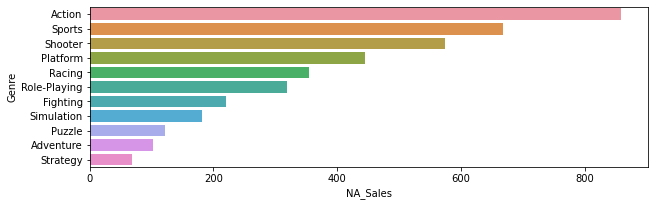

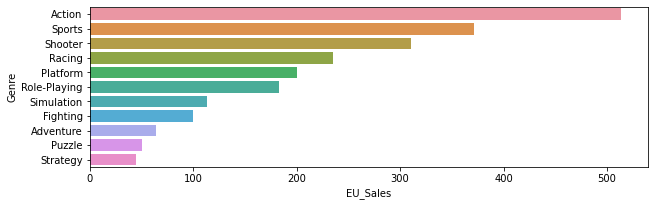

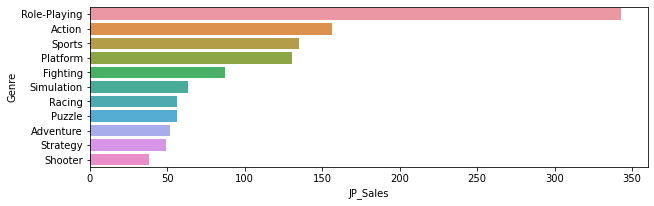

In [259]:

plt.figure(figsize=(10,10))
plt.title("Sum of sales by genre in North America",fontsize=25,y=1.05)
plt.xlabel("NA_Sales",fontsize=15)
plt.ylabel("Genre",fontsize=15,rotation=0)
plt.subplot(311)
sns.barplot(x="NA_Sales", y="Genre", data=NASales_Genre, orient='h')


plt.figure(figsize=(10,10))
plt.title("Sum of sales by genre in Europe",fontsize=25,y=1.05)
plt.xlabel("EU_Sales",fontsize=15)
plt.ylabel("Genre",fontsize=15,rotation=0)
plt.subplot(312)
sns.barplot(x="EU_Sales", y="Genre", data=EUSales_Genre, orient='h')


plt.figure(figsize=(10,10))
plt.title("Sum of sales by genre in Japan",fontsize=25,y=1.05)
plt.xlabel("JP_Sales",fontsize=15)
plt.ylabel("Genre",fontsize=15,rotation=0)
plt.subplot(313)
sns.barplot(x="JP_Sales", y="Genre", data=JPSales_Genre, orient='h')


인사이트 도출
---------
북미, 유럽 , 일본, 기타지역의 데이터를 활용해 
북미, 유럽, 일본의 게임 장르별 출고량의 합을 수평 막대그래프로 만들어 보았습니다.<br><br>
출고량은 선호도를 조사할 수 있는 가장 좋은 지표이기 때문에 출고량을 기준으로 조사하였습니다.<br>
시각화 과정에서 각 지역에서 기타 장르로 분류된 게임의 출고량을 제외시켰습니다.<br><br>
시각화한 자료를 통해 분석한 결과, 북미와 유럽을 비교했을 때 유럽에서 팔린 Racing장르의 출고량이 북미의 출고량에 비해 절대적인 수치는 적지만 상대적으로 지역별 게임시장에서 차지하는 비율은 더 높았습니다.<br>
위와 결과를 제외하면 북미와 유럽의 장르별 출고량 순위는 크게 다르지 않았습니다. 그 이유로는 비슷한 문화권 때문일 것으로 판단했습니다.<br>그 이유로 뒤에 설명할 내용에서는 북미와 유럽 지역을 서구권으로 분류하겠습니다.<br><br>
서구권과 일본의 게임 출고량을 비교해보았을 때 제일 먼저 도출해 낼 수 있는 정보는 
일본에서 Role-Playing 장르가 차지하는 비율이 압도적으로 높다는 것입니다.<br>

따라서 각 지역의 문화에 따라 특정 장르의 게임이 더 잘 팔릴 수 있다는 것을 알 수 있습니다.




2.연도별 게임의 트렌드
================

In [235]:
df1=df
df1 = df1.astype({'Year':'int64'})
df1 = df1[df1.Year >= 1980] # 시각적 탐색을 통해 1980년 밑으로는 0,1,2 등 Outlier가 있음을 발견했고 삭제 
df1['Platform'] = df1['Platform'].str.replace('2600', 'ATR') # Platform이 2600 인 것은 Atari-2600이라는 가정용 게임기인데 Outlier제거의 편의상 ATR로 변경
df1.reset_index(inplace=True)
df1=df1.drop('index',axis=1)

In [338]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16141 entries, 0 to 16140
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16141 non-null  object 
 1   Platform     16141 non-null  object 
 2   Year         16141 non-null  int64  
 3   Genre        16141 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16141 non-null  float64
 6   EU_Sales     16141 non-null  float64
 7   JP_Sales     16141 non-null  float64
 8   Other_Sales  16141 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [236]:
Year_Plat=df1.groupby(['Year','Platform']).count() #연도별 플랫폼 타이틀 갯수 
Year_Plat=Year_Plat.reset_index()

In [237]:
Year_Plat['Platform'].unique()

array(['ATR', 'NES', 'DS', 'PC', 'GB', 'GEN', 'SNES', 'GG', 'NG', 'SCD',
       '3DO', 'PS', 'SAT', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'GBA',
       'PS2', 'XB', 'GC', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV',
       'WiiU', 'PS4', 'XOne'], dtype=object)

In [238]:
Year_Plat['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

In [239]:
Year_Plat=Year_Plat[['Year','Platform','Genre']]

Year_Plat = Year_Plat.rename(columns = {'Genre' : 'Counts'}) #Genre가 타이틀 갯수를 나타냄으로 column명 변경

In [240]:
YP1= Year_Plat.loc[(Year_Plat['Year']>=2000) & (Year_Plat['Year']<2003)]
YP2= Year_Plat.loc[(Year_Plat['Year']>=2003) & (Year_Plat['Year']<2006)]
YP3= Year_Plat.loc[(Year_Plat['Year']>=2006) & (Year_Plat['Year']<2009)]
YP4= Year_Plat.loc[(Year_Plat['Year']>=2009) & (Year_Plat['Year']<2012)]
YP5= Year_Plat.loc[(Year_Plat['Year']>=2012) & (Year_Plat['Year']<2017)]


YP1=YP1.groupby('Platform').sum()
YP1=YP1.drop('Year',axis=1)
YP2=YP2.groupby('Platform').sum()
YP2=YP2.drop('Year',axis=1)
YP3=YP3.groupby('Platform').sum()
YP3=YP3.drop('Year',axis=1)
YP4=YP4.groupby('Platform').sum()
YP4=YP4.drop('Year',axis=1)
YP5=YP5.groupby('Platform').sum()
YP5=YP5.drop('Year',axis=1)

#3년씩 표현
#2016년 이후의 연도에는 충분한 데이터가 없음 따라서 2016년까지의 데이터만 사용

In [241]:
YPSS=pd.merge(YP1,YP2, on='Platform',how='outer').merge(YP3, on='Platform',how='outer').merge(YP4, on='Platform',how='outer').merge(YP5, on='Platform',how='outer')


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Counts_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [242]:
YPSS=YPSS.fillna('0') #Nan값을 0으로 채우기

YPSS.columns = ['2000~2002','2003~2005','2006~2009','2010~2012','2012~2016']

YPSS=YPSS.astype('float64')

YPSS=YPSS.T

YPSA=YPSS
YPSS

Platform,DC,GB,GBA,GC,N64,PC,PS,PS2,WS,XB,DS,PSP,X360,PS3,Wii,3DS,PSV,PS4,WiiU,XOne
2000~2002,29.0,26.0,304.0,173.0,69.0,41.0,267.0,543.0,4.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003~2005,0.0,0.0,433.0,321.0,0.0,100.0,3.0,771.0,0.0,538.0,138.0,111.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006~2009,2.0,0.0,43.0,44.0,0.0,187.0,0.0,657.0,0.0,66.0,1064.0,419.0,359.0,254.0,508.0,0.0,0.0,0.0,0.0,0.0
2010~2012,0.0,0.0,0.0,0.0,0.0,330.0,0.0,138.0,0.0,0.0,874.0,485.0,556.0,553.0,718.0,115.0,18.0,0.0,0.0,0.0
2012~2016,0.0,0.0,0.0,0.0,0.0,231.0,0.0,0.0,0.0,0.0,33.0,171.0,293.0,484.0,53.0,379.0,384.0,331.0,143.0,212.0


In [243]:
YPSS=YPSS.div(YPSS[[ 'DS', 'PC', 'GB',
        'PS', 'N64', 'DC', 'WS', 'GBA',
       'PS2', 'XB', 'GC', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV',
       'WiiU', 'PS4', 'XOne']].sum(axis = 1),axis = 0)

YPSS=(YPSS.T)*100

#해당 연도마다의 플랫폼 점유율을 백분율로 표현

Text(0.5, 69.0, 'Year')

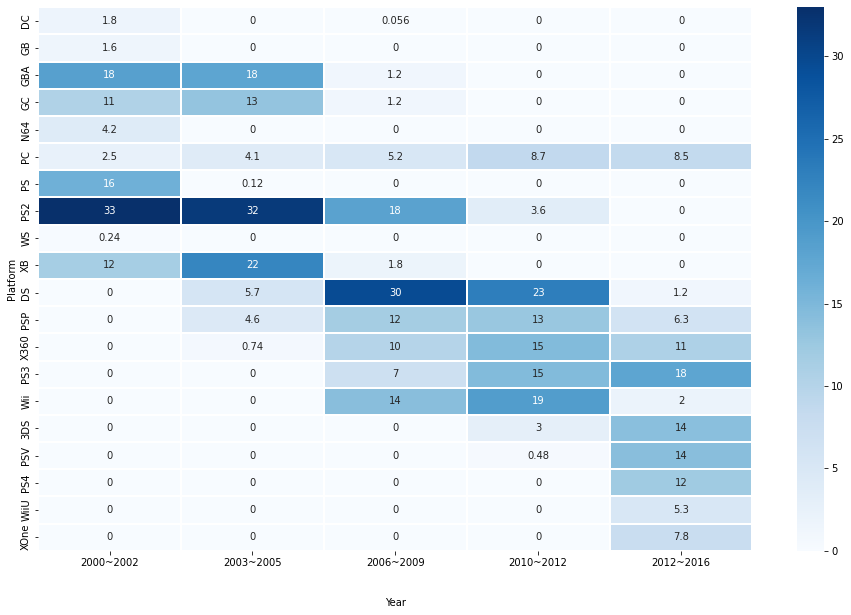

In [258]:
plt.figure(figsize=(16,10))

sns.heatmap(data=YPSS,cmap='Blues',linewidth=1,annot=True)
plt.xlabel('Year',labelpad=30)


In [246]:
YPSS=YPSS.T
YPSS

HVG=YPSS.loc[['DC','GC','N64','PC','PS','PS2','XB','X360','PS3','Wii','PS4','WiiU','XOne']] # Home Video Game 콘솔
PVG=YPSS.loc[['GB','GBA','WS','DS','PSP','3DS','PSV']] #Portable Video Game 콘솔

HVG=HVG.sum()
PVG=PVG.sum()
HVG=round(HVG,1)
PVG=round(PVG,1)

#거치용, 휴대용 게임기기로 분류

In [247]:
prop=pd.concat([HVG,PVG],axis=1)
prop.columns = ["HVG",  "PVG"]

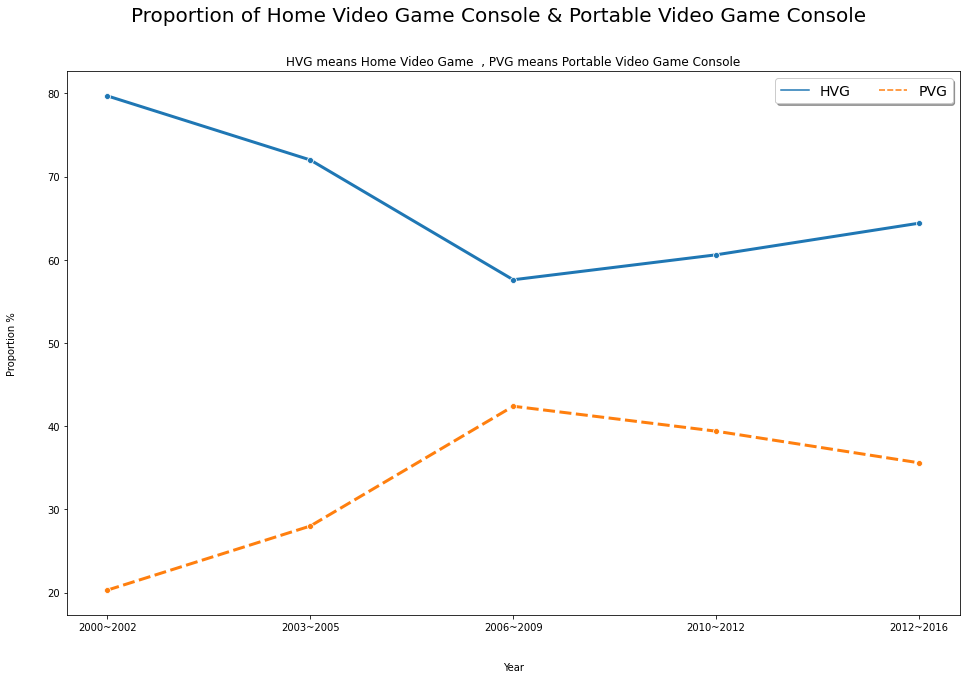

In [253]:
plt.figure(figsize=(16,10))
plt.suptitle('Proportion of Home Video Game Console & Portable Video Game Console',fontsize=20, y= 0.97)
plt.title('HVG means Home Video Game  , PVG means Portable Video Game Console')
plt.xlabel('Year',labelpad=30)
plt.ylabel('Proportion %',labelpad=30)
sns.lineplot(data=prop,marker='o',linewidth=3)
plt.legend(loc='best', ncol=2, fontsize=14, frameon=True, shadow=True);

In [249]:
YPSA=YPSA.T

Text(0, 0.5, 'Total Sales (M)')

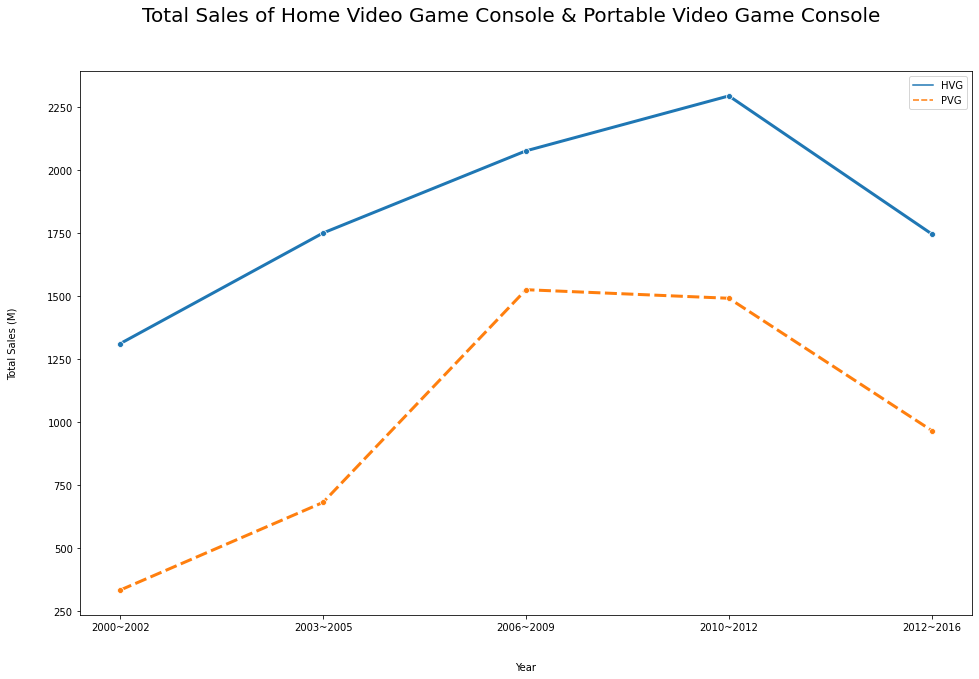

In [254]:
HVGG=YPSA.loc[['DC','GC','N64','PC','PS','PS2','XB','X360','PS3','Wii','PS4','WiiU','XOne']]
PVGG=YPSA.loc[['GB','GBA','WS','DS','PSP','3DS','PSV']]
HVGG=HVGG.sum()
PVGG=PVGG.sum()
propG=pd.concat([HVGG,PVGG],axis=1)
propG.columns = ["HVG",  "PVG"]


plt.figure(figsize=(16,10))
sns.lineplot(data=propG,marker='o',linewidth=3)
plt.suptitle('Total Sales of Home Video Game Console & Portable Video Game Console',fontsize=20, y= 0.97)
plt.xlabel('Year',labelpad=30)
plt.ylabel('Total Sales (M)',labelpad=30)

인사이트 도출
---------
2000년 부터 2016년 까지
platform을 기준으로 게임 타이틀 발매량을 조사하였습니다.<br>
발매량을 백분율로 산출한 뒤 heatmap으로 시각화 하였을 때 2000년 부터 2006년까지는 PS2,XBOX의 발매량이 강세를 보였다가, 2006~2009년 사이에 DS,PSP의 발매량 비율이 눈에 띄게 상승한 것을 볼 수 있었습니다.<br>
그 점에서 2000년대 중반 휴대용 게임기기의 인기가 시작되었다고 생각하여 Platform을 Home Video Game과 Portable Video Game으로 나누어 비율을 lineplot으로 나타내게 되었습니다.<br><br> 2000년대 중반 갑자기 높아진 PVG의 비율이 시간이 지남에 따라 점점 감소세를 보였는데, 이는 Dataset의 Platform label에  Mobilegame이 반영되지 않았기 때문이라 생각했습니다. 그래서 다른 통계([World's Mobilegame Market](https://www.statista.com/statistics/292512/mobile-contents-market-value-worldwide/))를 참고한 결과 역시나 모바일 게임시장의 규모는 가파르게 성장하고 있었고 더욱 성장할 것으로 보입니다. <br> 다만 PVG을 밀어내고 있는 것은 HVG가 아니라 휴대성을 띄고 있는 Mobilegame이기 때문에 위의 lineplot에서는 HVG가 성장하는 것으로 보일 수 있습니다. 하지만 절대적인 발매량은 mobile game이 성장함에 따라 전체적으로 감소하는 것을 알 수 있습니다.

 3.인기가 많은 게임에 대한 분석 및 시각화 프로세스
========

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df2=pd.read_csv('vgames2.csv')
df2=df2.drop('Unnamed: 0',axis=1)
df2=df2.dropna().reset_index()#결측치 제거
df2=df2.drop('index',axis=1)

def KM(X):
  containKM = X
  if 'K' in containKM:
    containKM.replace('K', '')
    containKM = float(containKM.replace('K', ''))
    return containKM/1000
  elif 'M' in containKM:
    containKM = containKM.replace('M', '')
    return float(containKM)
  else:
    return float(containKM)

df2['NA_Sales'] = df2.NA_Sales.apply(KM)
df2['EU_Sales'] = df2.EU_Sales.apply(KM)
df2['JP_Sales'] = df2.JP_Sales.apply(KM)
df2['Other_Sales'] = df2.Other_Sales.apply(KM)

In [135]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [219]:
Wld_Sales=df2.drop(['Name','Platform','Year','Genre','Publisher'],axis=1)
Wld_Sales=Wld_Sales.sum(axis=1)

df2['Total_Sales']=Wld_Sales 

df2=df2.sort_values(by='Total_Sales',ascending=False)
df2=df2.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)

#북미 유럽 일본 기타 국가의 출고량을 합산 
df2=df2[(df2['Year'] >=2010) & (df2['Year']<=2016)]
df2


,Name,Platform,Year,Genre,Publisher,Total_Sales
4253,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,21.82
3414,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,21.39
10695,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,16.38
2757,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,14.76
6119,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,14.64
...,...,...,...,...,...,...
8554,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.01
8537,Arabians Lost: The Engagement on Desert,PSP,2012.0,Adventure,Quinrose,0.01
8543,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.01
10420,Cities: Skylines Snowfall,PC,2016.0,Simulation,Paradox Development,0.01


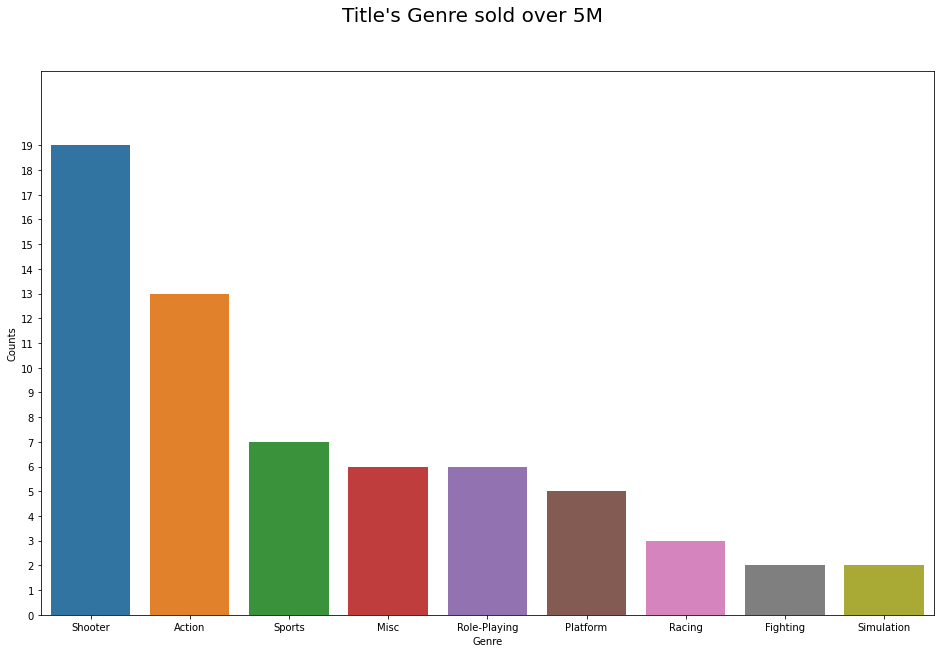

In [293]:
over5=df2[(df2['Total_Sales']>=5)]
over5=over5.groupby('Genre').count()
over5=over5['Name'].sort_values(ascending=False)
over5=over5.reset_index()
plt.figure(figsize=(16,10))
sns.barplot(data=over5,x='Genre',y='Name')
plt.suptitle("Title's Genre sold over 5M",fontsize=20, y= 0.97)
plt.ylabel('Counts')
plt.xlabel('Genre')
plt.ylim(0,22)
plt.yticks(np.arange(0, 20));
 #Total_Sales가 5M이상인 타이틀을 조사 후 장르별로 타이틀 갯수 구현

In [220]:
df2_count=df2.groupby('Genre')['Total_Sales'].count()
df2_mean=df2.groupby('Genre')['Total_Sales'].mean()
df2_count = df2_count.to_frame()
df2_mean = df2_mean.to_frame()

df2_count=df2_count.sort_values(by='Total_Sales',ascending=False)
df2_mean=df2_mean.sort_values(by='Total_Sales',ascending=False)


In [223]:
print(df2_count)
print(df2_mean)

              Total_Sales
Genre                    
Action               1428
Sports                567
Misc                  557
Role-Playing          547
Adventure             537
Shooter               390
Racing                231
Simulation            204
Fighting              194
Strategy              166
Platform              150
Puzzle                112
              Total_Sales
Genre                    
Shooter          1.170256
Platform         0.804867
Sports           0.567425
Racing           0.534589
Role-Playing     0.482962
Action           0.468824
Fighting         0.418196
Misc             0.410413
Simulation       0.345833
Strategy         0.213916
Puzzle           0.187054
Adventure        0.113203


In [224]:
df2_count_label=['Action','Sports','Misc',  'Role-Playing',
       'Adventure','Shooter', 'Racing','Simulation',
          'Fighting', 'Strategy','Platform', 'Puzzle']

df2_mean_label=['Shooter','Platform','Sports','Racing','Role-Playing',
                'Action','Fighting','Misc','Simulation','Strategy',
                'Puzzle','Adventure']

<ipython-input-225-a853cf789ce4>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df2_count,labels=df2_count_label,startangle=90,counterclock=True)
<ipython-input-225-a853cf789ce4>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df2_mean,labels=df2_mean_label,startangle=90,counterclock=True)


Text(0.5, 1.0, '2010~2016 Mean of Total Sales by genre')

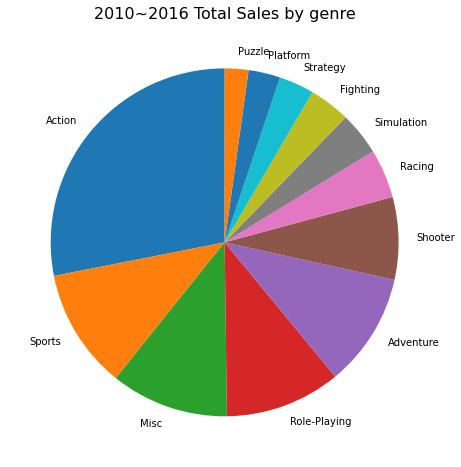

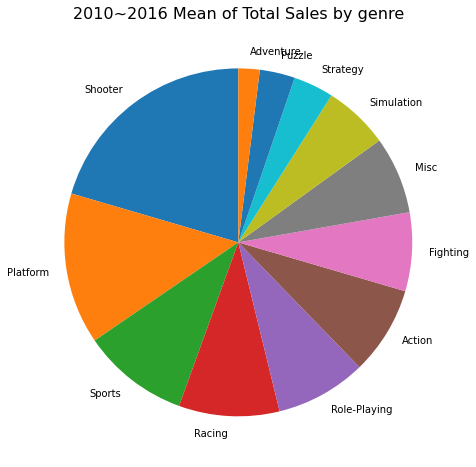

In [225]:
plt.figure(figsize=(8,8))
plt.pie(df2_count,labels=df2_count_label,startangle=90,counterclock=True)
plt.title('2010~2016 Total Sales by genre', fontsize=16)


plt.figure(figsize=(8,8))
plt.pie(df2_mean,labels=df2_mean_label,startangle=90,counterclock=True)
plt.title('2010~2016 Mean of Total Sales by genre', fontsize=16)

결론 도출
----

---


Platform: Nintendo Switch<br><br>
Genre: Platform


---

2017년 1분기에 Nintendo Switch(이하 스위치)가 출시되었습니다. 스위치는 출시와 동시에 게이머들의 이목을 집중시켰습니다. 이에 따라 SH게임즈는 출시 Platform을 스위치로 설정하고, 출고량에 따라 향후 다른 Platform으로의 이식을 고려하고 있습니다.<br><br>
주요 타겟층은 동아시아 , 북미 매니아층 입니다. SH게임즈는 그래픽 측면에 투자를 많이 할 수 없는 상황이고, 광고비 또한 많이 책정할 수 없습니다. <br>
SH게임즈는 주요 타겟층을 대변할 수 있는 일본의 장르별 출고량을 보았을 때 Sports를 제외한 Role-Playing, Action, Platform 장르의 게임이 상위권에 속하고 서로 접목가능하기 용이하다고 판단하였습니다.<br><br>

 2010~2016년 장르별 총 출고량과 장르별 출고량의 평균을 살펴 보았을 때 Platform과 Shooting 장르가 경쟁작이 적고 출고량의 평균이 높은 것으로 판단하였습니다.<br><br>
이에 따라 그래픽 투자비용이 낮은 **2D 슈팅 로그라이크** 게임을 제작하기로 결정하였습니다.